# **Proyecto de investigacion**


# **Introducción**

Como proyecto de investigación, se plantea la integración de los avances en Machine Learning y el uso de modelos pre-entrenados para desarrollar dos sistemas que permitan la detección y clasificación del avance del cáncer de pulmón en pacientes con diversas condiciones médicas.

El interés en esta área de investigación se debe a que el cáncer pulmonar es uno de los tipos de cáncer más comunes y que presenta una de las mayores tasas de mortalidad. Por esta razón, se ha decidido fortalecer los conocimientos en aprendizaje profundo con un proyecto capaz de ser utilizado en un área médica que prevenga el avance del cáncer de pulmón y favorezca su detección temprana. De esta manera, podremos estar más familiarizados con el trabajo que realizan los expertos en el área para prevenir que el cáncer alcance estados avanzados sin esperanza de recuperación.



# **Metodología**

Para llevar a cabo el proyecto, se utilizarán dos modelos distintos. En primer lugar, se empleará un perceptrón multicapa que se encargará de determinar si una persona podría tener cáncer de pulmón. Este modelo utilizará información relacionada con síntomas o hábitos vinculados a esta enfermedad.

El segundo modelo será utilizado para mejorar la precisión en aquellos casos en que las personas hayan sido identificadas como posibles pacientes de cáncer. Este segundo modelo clasificará imágenes de tomografías computarizadas de pulmones para determinar si el órgano está sano o presenta alguna anomalía. Para llevar a cabo esta tarea, se utilizará el modelo previamente entrenado VIT.

Además, se implementarán los conceptos de Random Forest y Validación Cruzada para mejorar la fiabilidad de ambos modelos. El algoritmo Random Forest combinará múltiples árboles de decisión para generar predicciones más precisas y evitar el sobreajuste del modelo. Por otro lado, la Validación Cruzada permitirá evaluar el rendimiento de los modelos en distintos conjuntos de datos, asegurando que sean robustos y generalicen bien a nuevos casos.

Con esta estrategia, se busca desarrollar un sistema más completo y confiable para la detección temprana de posibles casos de cáncer de pulmón, lo que podría tener un impacto significativo en la salud pública y el bienestar de las personas.








---
## **Primer Modelo "Determinar si un paciente tiene cancer con base en datos tabulados"**
---

Dataset obtenido de: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

# DATOS DISPONIBLES EN EL DATASET

GENDER: Género del individuo (M para masculino, F para femenino).

AGE: Edad del individuo.

SMOKING: Estado de fumador (1 para fumador, 2 para no fumador).

YELLOW_FINGERS: Presencia de dedos amarillos debido al tabaquismo (1 para sí, 2 para no).

ANXIETY: Nivel de ansiedad (1 para bajo, 2 para alto).

PEER_PRESSURE: Nivel de presión social para fumar (1 para bajo, 2 para alto).

CHRONIC DISEASE: Presencia de enfermedades crónicas (1 para sí, 2 para no).

FATIGUE: Nivel de fatiga (1 para bajo, 2 para alto).

ALLERGY: Presencia de alergias (1 para sí, 2 para no).

WHEEZING: Sibilancias (1 para sí, 2 para no).

ALCOHOL CONSUMING: Consumo de alcohol (1 para sí, 2 para no).

COUGHING: Tos (1 para sí, 2 para no).

SHORTNESS OF BREATH: Dificultad para respirar (1 para sí, 2 para no).

SWALLOWING DIFFICULTY: Dificultad para tragar (1 para sí, 2 para no).

CHEST PAIN: Dolor en el pecho (1 para sí, 2 para no).

LUNG_CANCER: Presencia de cáncer de pulmón (YES para sí, NO para no).

In [ ]:
#Imports necesarios

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

##Cargar los datos

In [ ]:
from google.colab import drive

# Montar Google Drive en el entorno de Google Colab
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Ruta del archivo en Google Drive (ajusta la ruta si el archivo se encuentra en una ubicación diferente)
ruta_del_archivo = '/content/drive/MyDrive/datos/survey lung cancer.csv'

# Cargar los datos en un DataFrame
df = pd.read_csv(ruta_del_archivo)

# Mostrar los primeros registros para verificar si los datos se cargaron correctamente
print(df.head())


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

##Visualizacion de los datos

In [ ]:
# Obtener información general sobre el DataFrame, incluyendo el tipo de datos y el conteo de valores no nulos.
print(df.info())

# Obtener estadísticas descriptivas de las columnas numéricas
print(df.describe())

# Obtener el conteo de valores únicos en cada columna categórica
print(df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Verificar si hay valores nulos en el DataFrame
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


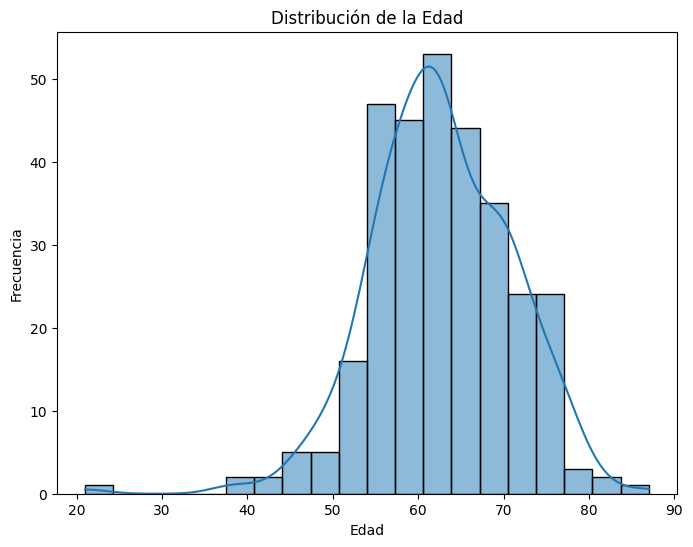

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizar la distribución de la variable 'AGE' con un histograma
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

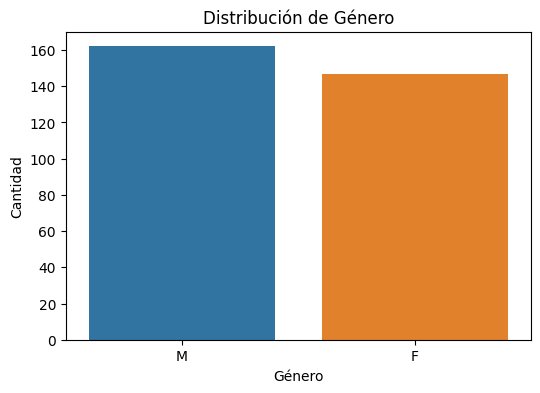

In [ ]:
# Visualizar la distribución de la variable 'GENDER' con un gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='GENDER')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

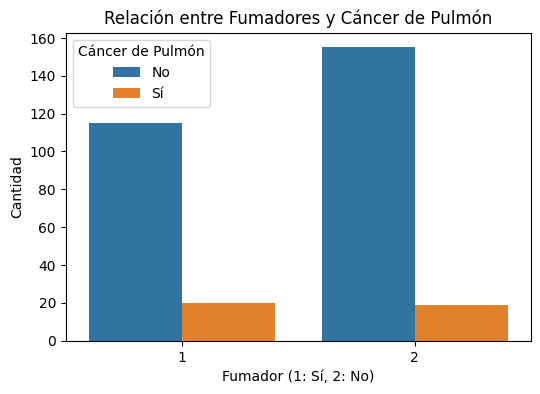

In [ ]:
# Visualizar la relación entre las variables 'SMOKING' y 'LUNG_CANCER' con un gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SMOKING', hue='LUNG_CANCER')
plt.title('Relación entre Fumadores y Cáncer de Pulmón')
plt.xlabel('Fumador (1: Sí, 2: No)')
plt.ylabel('Cantidad')
plt.legend(title='Cáncer de Pulmón', labels=['No', 'Sí'])
plt.show()


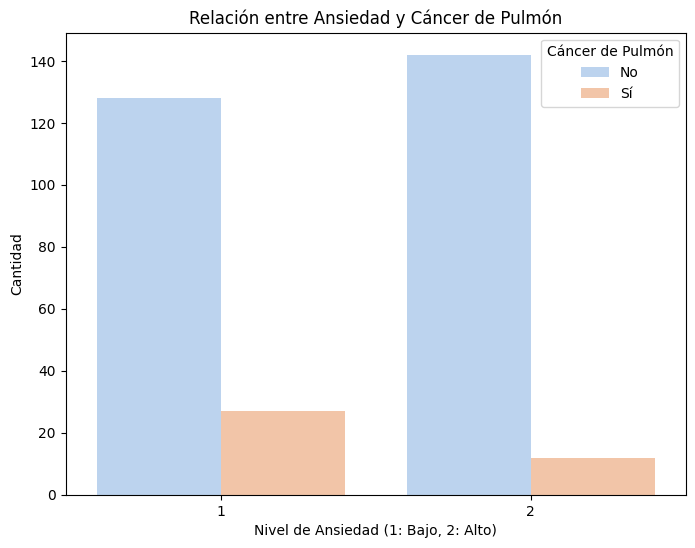

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ANXIETY', hue='LUNG_CANCER', palette='pastel', alpha=0.8)
plt.title('Relación entre Ansiedad y Cáncer de Pulmón')
plt.xlabel('Nivel de Ansiedad (1: Bajo, 2: Alto)')
plt.ylabel('Cantidad')
plt.legend(title='Cáncer de Pulmón', labels=['No', 'Sí'])
plt.show()

<ipython-input-43-93df7e017872>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


<Axes: >

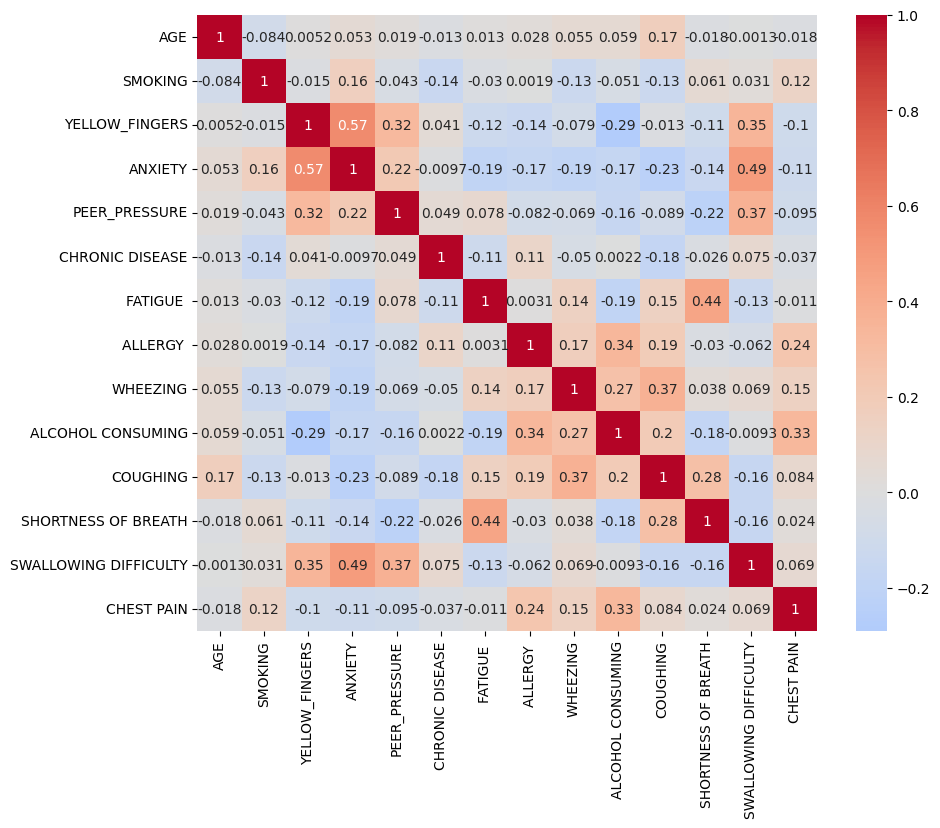

In [ ]:
# Visualizar las correlaciones entre variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

##Preprocesamiento
Se convierten las columnas "LUNG_CANCER" y "GENDER" en representaciones numéricas binarias. La columna "AGE" se convierte al tipo de datos entero (int). Luego, se muestra una muestra de los primeros registros del DataFrame para verificar los cambios.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Convertir la columna "LUNG_CANCER" a numérica
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})

# Convertir AGE a tipo int
df['AGE'] = df['AGE'].astype(int)

# Mostrar los primeros registros para verificar los cambios
print(df.head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2               

##Escalar los datos
Se seleccionan solo las columnas numéricas del DataFrame, excluyendo las columnas "GENDER" y "LUNG_CANCER". Se crea un objeto StandardScaler y se utilizan los datos seleccionados para realizar la estandarización, es decir, se transforman los datos para que tengan media cero y desviación estándar igual a uno. Finalmente, se muestra una muestra de los primeros registros del DataFrame para verificar los cambios.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Seleccionar solo las columnas numéricas para la estandarización, excluyendo 'GENDER' y 'LUNG_CANCER'
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).drop(columns=['GENDER', 'LUNG_CANCER']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar los datos (excluyendo 'GENDER' y 'LUNG_CANCER')
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Mostrar los primeros registros para verificar los cambios
print(df.head())


   GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0       1  0.771850 -1.135292        0.869300  1.003241      -1.003241   
1       1  1.381829  0.880830       -1.150351 -0.996769      -1.003241   
2       0 -0.448107 -1.135292       -1.150351 -0.996769       0.996769   
3       1  0.039876  0.880830        0.869300  1.003241      -1.003241   
4       0  0.039876 -1.135292        0.869300 -0.996769      -1.003241   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0        -1.009756  0.696833 -1.120480  0.892475           0.892475  0.852207   
1         0.990338  0.696833  0.892475 -1.120480          -1.120480 -1.173424   
2        -1.009756  0.696833 -1.120480  0.892475          -1.120480  0.852207   
3        -1.009756 -1.435063 -1.120480 -1.120480           0.892475 -1.173424   
4        -1.009756 -1.435063 -1.120480  0.892475          -1.120480  0.852207   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANC

##Separe los datos en datos de entrenamiento y evaluación
Los datos se dividen en conjuntos de entrenamiento y evaluación utilizando la función train_test_split de scikit-learn. El 80% de los datos se asignan al conjunto de entrenamiento y el 20% restante al conjunto de evaluación. Se muestra el tamaño de ambos conjuntos para verificar la división

In [ ]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y evaluación (80% / 20%)
X = df.drop(columns=['LUNG_CANCER'])  # Características (todo excepto la columna objetivo)
y = df['LUNG_CANCER']  # Variable objetivo

# train_test_split realiza la división aleatoria
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)



# Mostrar el tamaño de los conjuntos de entrenamiento y evaluación
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de evaluación:", X_eval.shape)

Tamaño del conjunto de entrenamiento: (247, 15)
Tamaño del conjunto de evaluación: (62, 15)


##Random Forest
En este fragmento de código, se utiliza el algoritmo RandomForestClassifier para realizar una tarea de clasificación en un conjunto de datos tabulados. Se crea el modelo con 100 estimadores y se ajusta a los datos de entrenamiento. Luego, se realiza la predicción en el conjunto de evaluación y se calcula la precisión de la predicción mediante la métrica accuracy_score. El resultado de la precisión se imprime en pantalla.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear un objeto RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf.fit(X_train, y_train)

# Predecir las etiquetas para los datos de evaluación
y_pred = rf.predict(X_eval)

# Calcular la precisión de la predicción
accuracy = accuracy_score(y_eval, y_pred)
print('Accuracy: ', accuracy)




Accuracy:  0.967741935483871


##Validacion cruzada
Se utiliza la validación cruzada de 5-fold para evaluar el rendimiento de un clasificador de bosque aleatorio (RandomForestClassifier) en un conjunto de datos. Se crea el clasificador con 100 árboles de decisión y una semilla aleatoria. Luego, se aplica la validación cruzada de 5-fold en las características (X) y las etiquetas (y) utilizando el clasificador. La métrica utilizada para evaluar el rendimiento es la precisión. Se muestra el puntaje de precisión obtenido en cada iteración de la validación cruzada y también se calcula el promedio de precisión para tener una estimación general del rendimiento del modelo.

In [ ]:
from sklearn.model_selection import cross_val_score


# Crear un objeto RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar una validación cruzada de 5-fold
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Mostrar los scores de cada fold y el promedio
print('Scores en cada iteración: ', scores)
print('Promedio de exactitud: ', scores.mean())

Scores en cada iteración:  [0.93548387 0.87096774 0.93548387 0.90322581 0.95081967]
Promedio de exactitud:  0.9191961924907457


##Diferentes estimadores

Se define una lista de diferentes cantidades de estimadores para un clasificador Random Forest: [50, 100, 200, 500, 1000]. Se realiza un bucle en el que se entrena un clasificador Random Forest para cada cantidad de estimadores y se evalúa su rendimiento mediante la validación cruzada de 5-fold. Los resultados de precisión promedio para cada cantidad de estimadores se almacenan en la lista "results". Luego, se imprimen los resultados mostrando el número de estimadores y su precisión promedio correspondiente. Finalmente, se recomienda la mejor configuración de cantidad de estimadores que obtuvo la mayor precisión promedio durante la validación cruzada.

In [ ]:
# Definir las cantidades de estimadores a probar
n_estimators = [50, 100, 200, 500, 1000]

# Para guardar los resultados
results = []

# Entrenar un Random Forest con cada cantidad de estimadores
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
    results.append(scores.mean())

# Imprimir los resultados
for n, accuracy in zip(n_estimators, results):
    print(f'Número de estimadores: {n}, Promedio de exactitud: {accuracy}')

# Recomienda la mejor configuración de cantidad de estimadores
best_n_estimators = n_estimators[np.argmax(results)]
print(f'La mejor configuración para n_estimators es {best_n_estimators} con una exactitud promedio de {max(results)}')

Número de estimadores: 50, Promedio de exactitud: 0.9127445795875199
Número de estimadores: 100, Promedio de exactitud: 0.9191961924907457
Número de estimadores: 200, Promedio de exactitud: 0.9191961924907457
Número de estimadores: 500, Promedio de exactitud: 0.9191961924907457
Número de estimadores: 1000, Promedio de exactitud: 0.9191961924907457
La mejor configuración para n_estimators es 100 con una exactitud promedio de 0.9191961924907457


##Perceptron Multicapa
En este fragmento de código, primero se estandarizan los datos de entrenamiento y evaluación utilizando el objeto scaler. Luego, los datos estandarizados se convierten a tensores de PyTorch usando la clase torch.tensor(). Los datos de entrenamiento X_train se convierten a tensores de tipo torch.float32, mientras que las etiquetas y_train se convierten a tensores de tipo torch.float32 y se ajustan a una columna utilizando el método view(-1, 1).

De manera similar, los datos de evaluación X_eval se convierten a tensores de tipo torch.float32, y las etiquetas y_eval se convierten a tensores de tipo torch.float32 y se ajustan a una columna utilizando el método view(-1, 1).

In [ ]:
import torch
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)

# Convertir los datos a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Convertir los datos a tensores de PyTorch
X_eval = torch.tensor(X_eval, dtype=torch.float32)
y_eval = torch.tensor(y_eval.values, dtype=torch.float32).view(-1, 1)



 En el código, se define una red neuronal Multi-Layer Perceptron (MLP) con tres capas lineales y funciones de activación ReLU. La primera capa tiene 15 unidades de entrada y la última capa tiene una sola unidad de salida para realizar una clasificación binaria. Se utilizan capas de batch normalization después de las capas ocultas para mejorar el rendimiento del entrenamiento. Esta arquitectura se implementa en una clase llamada MLP, y luego se crea una instancia de la red con el nombre net.

In [ ]:
from torch import nn
# Definir la arquitectura de la red con mejoras
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        # Entrada de tamaño 15 (para las 15 características)
        self.input_layer = nn.Linear(15, 32)

        # Capas ocultas con batch normalization
        self.hidden_layer1 = nn.Linear(32, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.hidden_layer2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)

        # Salida de tamaño 1 (para la clasificación binaria)
        self.output_layer = nn.Linear(32, 1)

        # Función de activación ReLU
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(x)

        x = self.hidden_layer1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.hidden_layer2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.output_layer(x)

        return x



# Crear una instancia de la red
net = MLP()

##Hiperparametros
Se definen el optimizador y la función de pérdida para entrenar la red neuronal. Se utiliza el algoritmo de optimización Adam con una tasa de aprendizaje de 0.001, y la función de pérdida utilizada es Binary Cross Entropy With Logits (BCEWithLogitsLoss), que es comúnmente utilizada en problemas de clasificación binaria con redes neuronales. Además, se especifica que se realizarán 50 épocas de entrenamiento, y se utilizará un tamaño de lote de 32. Estos hiperparámetros son importantes para controlar la velocidad y la calidad del entrenamiento de la red.

In [ ]:
import torch.optim as optim
# Definir el optimizador (Adam) y función de pérdida (BCEWithLogitsLoss)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.BCEWithLogitsLoss()

# Definir épocas y tamaño del lote
epochs = 50
batch_size = 32

##Entrenamiento
En este código, se realiza el entrenamiento de un modelo de red neuronal durante un número específico de épocas. Se divide el conjunto de entrenamiento en lotes, se calcula la pérdida y se actualizan los pesos del modelo utilizando el optimizador Adam. Luego, se evalúa el modelo en el conjunto de validación para calcular la pérdida correspondiente. Se almacenan las pérdidas de entrenamiento y validación en las listas train_losses y val_losses para su posterior análisis. Al final de cada época, se muestra el progreso del entrenamiento.

In [ ]:
# Lista para almacenar la pérdida de entrenamiento y validación en cada época
train_losses = []
val_losses = []

# Entrenar el modelo
for epoch in range(epochs):
    running_train_loss = 0.0
    running_val_loss = 0.0

    # Entrenamiento
    net.train()
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Validación
    net.eval()
    with torch.no_grad():
        for i in range(0, len(X_eval), batch_size):
            batch_X_val = X_eval[i:i+batch_size]
            batch_y_val = y_eval[i:i+batch_size]

            val_outputs = net(batch_X_val)
            val_loss = loss_function(val_outputs, batch_y_val)

            running_val_loss += val_loss.item()

    avg_train_loss = running_train_loss / (len(X_train) / batch_size)
    avg_val_loss = running_val_loss / (len(X_eval) / batch_size)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')


Epoch 1/50, Train Loss: 0.6764434938006073, Val Loss: 0.7250863352129536
Epoch 2/50, Train Loss: 0.5749255886927307, Val Loss: 0.6508014432845577
Epoch 3/50, Train Loss: 0.5058822361563864, Val Loss: 0.5701886453936177
Epoch 4/50, Train Loss: 0.4511639869164841, Val Loss: 0.4948666480279738
Epoch 5/50, Train Loss: 0.4056387681227464, Val Loss: 0.43122762249362084
Epoch 6/50, Train Loss: 0.3670748467387458, Val Loss: 0.3805615363582488
Epoch 7/50, Train Loss: 0.3337692500126024, Val Loss: 0.3389887809753418
Epoch 8/50, Train Loss: 0.30463264442165855, Val Loss: 0.3062327215748449
Epoch 9/50, Train Loss: 0.2788565805566456, Val Loss: 0.2797255746779903
Epoch 10/50, Train Loss: 0.2564158709908304, Val Loss: 0.25876051379788306
Epoch 11/50, Train Loss: 0.23658941631857683, Val Loss: 0.24201354672831873
Epoch 12/50, Train Loss: 0.21961386097587554, Val Loss: 0.2280189375723562
Epoch 13/50, Train Loss: 0.2044441072564376, Val Loss: 0.21486760723975398
Epoch 14/50, Train Loss: 0.1910252841378

##Calcular la exactitud del modelo
se evalúa el modelo entrenado en los datos de evaluación para calcular la exactitud del modelo. Las predicciones se obtienen aplicando una función de activación sigmoide a las salidas del modelo y luego se realiza una umbralización para obtener las predicciones binarias. La exactitud representa la proporción de predicciones correctas realizadas por el modelo en el conjunto de evaluación.

In [ ]:
with torch.no_grad():
    net.eval()
    eval_outputs = net(X_eval)
    eval_outputs = torch.sigmoid(eval_outputs)
    eval_predictions = (eval_outputs >= 0.5).float()
    accuracy = (eval_predictions == y_eval).float().mean()
    print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.9677419066429138


##Clasificar una muestra
Se selecciona una muestra aleatoria del conjunto de evaluación y se la pasa al modelo entrenado para obtener una predicción. Se imprime la muestra de entrada, la etiqueta real correspondiente, la probabilidad de pertenecer a la clase positiva (clase 1) y la predicción realizada por el modelo (True o False, dependiendo del umbral de 0.5).

In [ ]:
import random

# Elegir una muestra aleatoria del conjunto de evaluación
sample_idx = random.randint(0, len(X_eval) - 1)
sample_X = X_eval[sample_idx]
sample_y = y_eval[sample_idx]

# Ajustar las dimensiones de la muestra para que sea 2D (1 fila, 8 columnas)
sample_X = sample_X.unsqueeze(0)

# Obtener la predicción del modelo
with torch.no_grad():
    net.eval()
    sample_output = net(sample_X)
    sample_prob = torch.sigmoid(sample_output)
    sample_prediction = (sample_prob >= 0.5).item()

# Imprimir los resultados
print("Muestra de entrada:")
print(sample_X)
print("Etiqueta real:")
print(sample_y.item())
print("Probabilidad de clase positiva (clase 1):")
print(sample_prob.item())
print("Predicción:")
print(sample_prediction)



Muestra de entrada:
tensor([[ 0.9334, -0.5268,  0.8742,  0.9183,  1.0456,  1.0122,  1.0371, -1.5590,
         -1.0714, -1.0890,  0.9183, -1.1824, -1.3930,  1.1533,  0.9183]])
Etiqueta real:
1.0
Probabilidad de clase positiva (clase 1):
0.9925057291984558
Predicción:
True


##Visualizar resultados
Este código crea una gráfica que muestra la pérdida de entrenamiento y validación en función del número de épocas. Utiliza las listas train_losses y val_losses para obtener los valores de pérdida. La gráfica muestra la curva de pérdida para el entrenamiento y la validación en el eje y, mientras que el eje x representa el número de épocas.

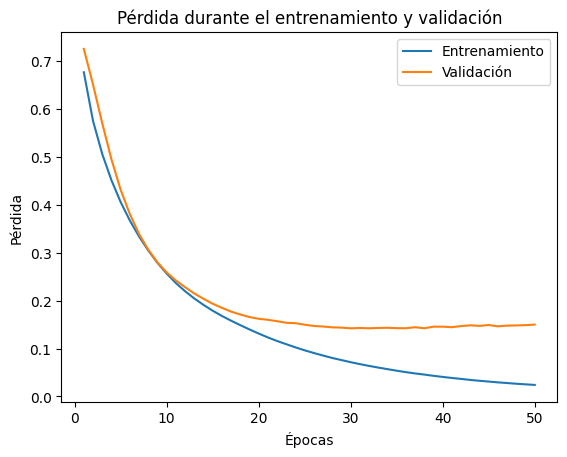

In [ ]:
# Graficar la pérdida de entrenamiento y validación en función del número de épocas
plt.plot(range(1, epochs+1), train_losses, label='Entrenamiento')
plt.plot(range(1, epochs+1), val_losses, label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento y validación')
plt.show()


Se evalúa el modelo entrenado utilizando el conjunto de validación y calcula diferentes métricas de evaluación, como precisión, recuperación (recall), puntuación F1 y exactitud (accuracy). Las predicciones del modelo para el conjunto de validación se comparan con las etiquetas reales utilizando las funciones de sklearn.metrics. Finalmente, se imprimen los resultados de cada métrica en formato decimal con dos decimales.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluación del modelo en el conjunto de validación
with torch.no_grad():
    net.eval()
    eval_outputs = net(X_eval)
    eval_outputs = torch.sigmoid(eval_outputs)
    eval_predictions = (eval_outputs >= 0.5).float()

# Convertir las predicciones y etiquetas a arreglos numpy
eval_predictions = eval_predictions.numpy().flatten()
y_eval_np = y_eval.numpy().flatten()

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_eval_np, eval_predictions)
precision = precision_score(y_eval_np, eval_predictions)
recall = recall_score(y_eval_np, eval_predictions)
f1 = f1_score(y_eval_np, eval_predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Accuracy: 0.97
Precision: 0.98
Recall: 0.98
F1-Score: 0.98


1. **Comportamiento de la pérdida**: Observamos que la pérdida de entrenamiento y validación disminuyó a medida que avanzaron las épocas. Inicialmente, ambas pérdidas eran altas, pero después de aproximadamente 10 épocas, comenzaron a converger hacia valores más bajos y estables. Esto indica que el modelo estaba aprendiendo bien a partir de los datos de entrenamiento y generalizando adecuadamente a los datos de validación.

2. **Métricas de evaluación**: Las métricas de evaluación obtenidas en el conjunto de validación son bastante altas, lo que indica que el modelo es capaz de realizar buenas predicciones sobre datos que no ha visto durante el entrenamiento. La exactitud (accuracy) es del 97%, lo que significa que el modelo clasifica correctamente el 97% de las muestras en el conjunto de validación. Además, tanto la precisión, la recuperación (recall) y la puntuación F1 tienen un valor de aproximadamente 0.98, lo que muestra un buen equilibrio entre precisión y exhaustividad en las predicciones.

3. **Comportamiento de la gráfica de entrenamiento y validación**: La gráfica muestra que la pérdida de entrenamiento disminuye rápidamente al principio, pero luego disminuye más lentamente a medida que las épocas avanzan. Por otro lado, la pérdida de validación es más alta y se mantiene más constante a lo largo de las épocas. Esto sugiere que el modelo se está ajustando bien a los datos de entrenamiento y tiene un buen rendimiento en el conjunto de validación, pero también muestra una tendencia a sobreajustarse en las últimas etapas del entrenamiento debido a la discrepancia entre las pérdidas de entrenamiento y validación.

---
# **Segundo Modelo "Clasificación de anomalías en pulmones mediante tomografías computarizadas"**
---

Este dataset contiene imágenes de tomografías computarizadas de pacientes que padecen cáncer de pulmón. También incluye imágenes de tomografías de pulmones sanos con el propósito de entrenar un modelo capaz de clasificar las imágenes en las siguientes categorías:

* Adenocarcinoma
* Large cell carcinoma
* Squamous cell carcinoma
* Normal

conjunto disponible en: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images

##Bibliotecas *necesarias*

In [ ]:
pip install accelerate


In [ ]:
pip install transformers datasets evaluate


In [ ]:
pip install transformers --upgrade

In [ ]:
from google.colab import drive
from transformers import AutoImageProcessor, ViTForImageClassification
from datasets import load_dataset
drive.mount('/content/drive')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  #Para crear graficos

# model evaluation
from sklearn import metrics



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Carga de datos

Se cargan conjuntos de datos de imágenes para entrenar y probar un modelo utilizando PyTorch. Se definen transformaciones para redimensionar y normalizar las imágenes. Luego, se establece el tamaño de los mini lotes y se crean iteradores para acceder a los datos durante el entrenamiento y la prueba. Esto permite preparar los datos de manera adecuada para el proceso de aprendizaje del modelo y se crean los datasets de entrenamiento y prueba

In [ ]:
train_dir = '/content/drive/My Drive/datos/train'
test_dir = '/content/drive/My Drive/datos/test'

# Definición de la transformación: A Tensor y normalización
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),  # Redimensionar imágenes
    torchvision.transforms.ToTensor(),  # Convertir a Tensor
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar en el rango [-1, 1]
])


# Se cargan los datos de entrenamiento y prueba
trainset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
testset = torchvision.datasets.ImageFolder(root=test_dir, transform=transform)

# Se define el tamaño de los mini batches que se van a utilizar para
# el entrenamiento y las pruebas.
batch_size = 32

# Se definen los iteradores en los conjuntos de datos de entrenamiento y pruebas
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


##Descarga del modelo

Ahora cargamos un modelo Vision Transformer (ViT) preentrenado para el procesamiento y clasificación de imágenes. Primero, se carga un procesador de imágenes (AutoImageProcessor) y luego el modelo ViT específico para clasificación (ViTForImageClassification). Ambos están preentrenados en un conjunto de datos grande y se pueden utilizar para tareas de clasificación de imágenes.

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

In [ ]:
# Obtener todas las etiquetas únicas del dataset
labels = trainset.classes

# Crear el mapeo entre las etiquetas y sus IDs
label2id = {label: str(i) for i, label in enumerate(labels)}
id2label = {str(i): label for i, label in enumerate(labels)}

print(label2id)

{'Adenocarcinoma': '0', 'Large cell carcinoma': '1', 'Squamous cell carcinoma': '2', 'normal': '3'}


Estamos cargando un procesador de imágenes preentrenado llamado "google/vit-base-patch16-224-in21k" utilizando la clase AutoImageProcessor de la biblioteca Transformers. Este procesador es específico para el modelo Vision Transformer (ViT) con arquitectura "vit-base-patch16-224" y preentrenado en un conjunto de datos con 21,000 clases. El procesador se utiliza para transformar y preparar imágenes antes de alimentarlas al modelo ViT para tareas de clasificación de imágenes.

In [ ]:
from transformers import AutoImageProcessor

checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

##Preprocesamiento
En este código, estamos configurando los argumentos de entrenamiento utilizando la clase TrainingArguments de la biblioteca Transformers. Algunas de las configuraciones importantes incluyen:

* output_dir: Especifica la carpeta donde se guardarán los resultados y los modelos entrenados.

* num_train_epochs: Especifica el número de épocas de entrenamiento (en este caso, 7 épocas).

* per_device_train_batch_size: Especifica el tamaño del lote de entrenamiento por dispositivo (en este caso, 32).

* per_device_eval_batch_size: Especifica el tamaño del lote de evaluación por dispositivo (en este caso, 32).

* save_steps: Especifica cada cuántos pasos se guardará el modelo durante el entrenamiento (en este caso, cada 500 pasos).

* save_total_limit: Especifica el número máximo de modelos a guardar (en este caso, se guardarán hasta 2 modelos).

* evaluation_strategy: Especifica la estrategia de evaluación durante el entrenamiento (en este caso, se evaluará cada ciertos pasos).

* eval_steps: Especifica cada cuántos pasos se realizará la evaluación durante el entrenamiento (en este caso, cada 500 pasos).

* logging_steps: Especifica cada cuántos pasos se imprimirán los registros de
entrenamiento (en este caso, cada 100 pasos).

In [ ]:
from transformers import TrainingArguments


# Configuraciones de entrenamiento
training_args = TrainingArguments(
    output_dir="./output",
    num_train_epochs=7,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_steps=500,
    save_total_limit=2,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_steps=100,
)

Se realiza una división para obtener un conjunto de datos de entrenamiento y otro de prueba. Luego, se define una función "collate_fn" para combinar las imágenes y etiquetas en lotes. Finalmente, se crean iteradores (trainloader y testloader) para los conjuntos de entrenamiento y prueba, respectivamente.

In [ ]:
from datasets import load_dataset

dataset = trainset

# Datos de prueba
test_size = 0.2

# Obtener la cantidad de valores de prueba
test_data_size = int(test_size * len(dataset))

# Número de datos de entrenamiento
train_data_size = len(dataset) - test_data_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_data_size, test_data_size])

def collate_fn(batch):
    # Obtenemos las imágenes y las etiquetas del batch
    images = torch.stack([item[0] for item in batch])
    labels = torch.tensor([item[1] for item in batch])

    inputs = {
        "pixel_values": images,
        "labels": labels
    }

    return inputs


trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


El código utiliza la función "notebook_login()" de la biblioteca "huggingface_hub" para iniciar sesión en Hugging Face, lo que permite el acceso a recursos adicionales y autenticación para cargar y compartir modelos con la comunidad de Hugging Face.

El código utiliza el objeto "default_data_collator" de la biblioteca "transformers" para definir un mecanismo predeterminado de combinación de datos que se utilizará durante el entrenamiento del modelo. Este objeto se encarga de agrupar y combinar los datos en lotes (batches) antes de ser alimentados al modelo.

In [ ]:
from transformers import default_data_collator

data_collator = default_data_collator


La función "compute_metrics" calcula la exactitud del modelo utilizando las predicciones y etiquetas reales. Devuelve el valor de exactitud como resultado.

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

##Modelo
El código define un modelo de clasificación de imágenes utilizando el modelo preentrenado "checkpoint" de la biblioteca Transformers. El modelo se inicializa con la arquitectura del modelo preentrenado y se configura para el número de etiquetas de clasificación específicas del problema, utilizando los diccionarios "id2label" y "label2id" para mapear entre identificadores y etiquetas de clase.

In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

# Define el modelo y sus configuraciones
model = AutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Entrenamiento
En este fragmento de código, se realiza el entrenamiento del modelo utilizando el objeto Trainer de la biblioteca Transformers. Se configura el entrenador con el modelo definido anteriormente, los argumentos de entrenamiento definidos en training_args, y se proporcionan los conjuntos de datos de entrenamiento (trainloader.dataset) y prueba (testloader.dataset). También se especifica la función collate_fn para el procesamiento de datos.

In [ ]:
# Entrenamiento del modelo usando el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=trainloader.dataset,  # Utiliza el dataset de entrenamiento original
    eval_dataset=testloader.dataset,    # Utiliza el dataset de prueba original
    data_collator=collate_fn,
)

trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss


TrainOutput(global_step=112, training_loss=0.5195800811052322, metrics={'train_runtime': 221.5541, 'train_samples_per_second': 15.513, 'train_steps_per_second': 0.506, 'total_flos': 2.663447425471365e+17, 'train_loss': 0.5195800811052322, 'epoch': 7.0})

##Evalucion del modelo
En este fragmento de código, se evalúa el modelo entrenado utilizando el conjunto de prueba (testloader). Se hace uso de la GPU si está disponible. El modelo se pone en modo de evaluación (model.eval()) para desactivar el cálculo de gradientes y reducir el uso de memoria durante la evaluación.

Luego, se itera sobre el conjunto de prueba y se obtienen las etiquetas predichas y las etiquetas reales. Las predicciones se obtienen tomando el índice de la clase con mayor probabilidad de los logits producidos por el modelo.

A continuación, se calculan varias métricas de evaluación, incluyendo exactitud (accuracy), precisión (precision), recall (recall), y F1-score (f1). Estas métricas se calculan utilizando las etiquetas reales y las etiquetas predichas, y son métricas comunes para evaluar el rendimiento de modelos de clasificación.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Verificar si GPU está disponible y configurar el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Ponemos el modelo en modo de evaluación
model.eval()

# Listas para almacenar las etiquetas reales y las predicciones
true_labels = []
predicted_labels = []

# Desactivamos el cálculo de gradientes
with torch.no_grad():
    for batch in testloader:
        input_images, labels = batch["pixel_values"], batch["labels"]
        input_images = input_images.to(device)  # Mover las imágenes al dispositivo (por ejemplo, "cuda" si estás usando GPU)
        labels = labels.to(device)  # Mover las etiquetas al dispositivo
        outputs = model(input_images)
        logits = outputs.logits
        predicted_classes = torch.argmax(logits, dim=1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted_classes.cpu().numpy())

# Convertimos las listas a arreglos de NumPy
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculamos las métricas
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Imprimimos las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)


Accuracy: 0.9754098360655737
Precision: 0.9764778936910085
Recall: 0.9754098360655737
F1: 0.9752521652735481


##Visualizacion de los resultados
En este fragmento de código, se calcula y grafica la matriz de confusión para evaluar el rendimiento del modelo de clasificación. La matriz de confusión muestra las predicciones correctas e incorrectas para cada clase en un formato tabular. Se utiliza la función confusion_matrix de scikit-learn para calcularla y luego se grafica utilizando la función plot_confusion_matrix. La gráfica muestra las tasas de aciertos y errores para cada clase, lo que ayuda a evaluar el rendimiento del modelo en la clasificación.

Matriz de Confusión Normalizada
[[1.         0.         0.         0.        ]
 [0.08333333 0.91666667 0.         0.        ]
 [0.         0.         0.96428571 0.03571429]
 [0.         0.         0.         1.        ]]


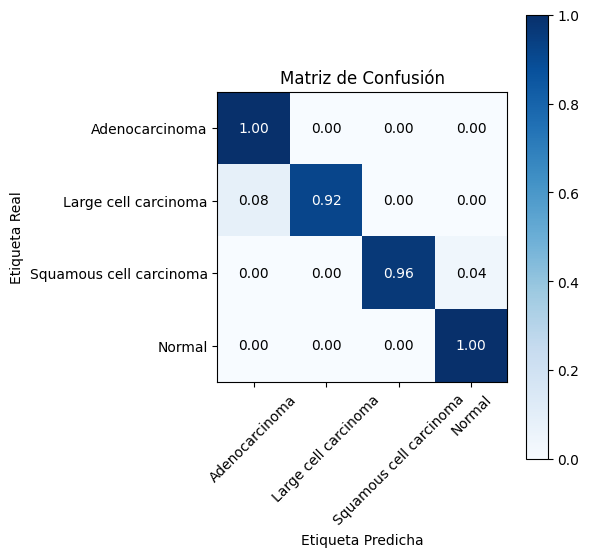

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Definimos las etiquetas de las clases
class_names = ["Adenocarcinoma", "Large cell carcinoma", "Squamous cell carcinoma", "Normal"]

# Función para plotear la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusión', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión sin Normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

# Plotear la matriz de confusión
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Matriz de Confusión')
plt.show()


En este fragmento de código, se evalúa el modelo entrenado en una muestra del conjunto de pruebas y se visualiza cada imagen junto con la clase predicha y la clase real correspondiente. Esto nos permite inspeccionar cómo el modelo se desempeña en ejemplos individuales del conjunto de pruebas.

In [ ]:
# Ponemos el modelo en modo de evaluación
model.eval()

# Obtener un batch del conjunto de pruebas (en este caso, solo un batch con una imagen)
test_batch = next(iter(testloader))

# Extraer la imagen y la etiqueta del batch
input_images, labels = test_batch["pixel_values"], test_batch["labels"]


input_images = input_images.to(device)


with torch.no_grad():
    # Pasamos la imagen a través del modelo
    outputs = model(input_images)
    logits = outputs.logits
    predicted_classes = torch.argmax(logits, dim=1)

# Clases posibles
class_names = ["0", "1", "2"]

# Iterar sobre cada imagen en el batch
for j in range(len(predicted_classes)):
    predicted_class = predicted_classes[j].item()
    true_class = labels[j].item()

    # Obtén la imagen y la etiqueta
    img = torchvision.transforms.ToPILImage()(input_images[j].cpu())
    plt.imshow(img)
    plt.show()

    # Imprime la información de la clase predicha y la clase real
    predicted_label = id2label[str(predicted_class)]
    true_label = id2label[str(true_class)]
    print(f"Imagen {j + 1} - Clase Predicha: {predicted_label}, Clase Real: {true_label}")


# **Resultados obtenidos**


1. El modelo preentrenado VIT demuestra una alta precisión al clasificar imágenes de pulmones con o sin anomalías. Durante las pruebas con el conjunto de datos, se observa que en la gran mayoría de los casos se presenta problemas unicamente en la clase Adenocarcinoma, esto se debe principalmente a que las imagenes son facilmente reconocibles, con rasgos caracteristicos de cada tipo de enfermadad, ademas un factor importante que creemos que facilita la identificación por parte del modelo es que las imagenes se encuentran en escala de grises.

2. Al analizar la matriz de confusión, se destaca que la diagonal muestra resultados superiores al 90% en la mayoría de los casos.
La alta precisión en esta matriz es un indicador de la efectividad del modelo. Esto sugiere que el modelo ha clasificado correctamente la gran mayoría de las instancias en el conjunto de datos evaluado, lo cual es un logro significativo.

# **Conclusiones**

Ambos modelos, el perceptron multicapa y la matriz de confusion, arrojaron resultados excelentes, demostrando el poder de la tecnología y el aprendizaje profundo para crear modelos capaces de predecir enfermedades o condiciones que podrían afectar la vida de las personas. Aunque es evidente que un sistema como este no puede reemplazar el criterio clínico de un experto, es sorprendente ver cómo un modelo puede brindar una valiosa ayuda a los especialistas en sus labores diarias.

En particular, el modelo MLP logró alcanzar una precisión, recuperación y puntuación F1 cercanas al 98%, lo que indica una alta capacidad para identificar tanto los casos positivos como los negativos de cáncer de pulmón. Esto es especialmente relevante en el contexto del diagnóstico temprano, donde una detección precoz podría tener un impacto significativo en la eficacia del tratamiento y, en última instancia, en la calidad de vida de los pacientes.

Estos avances en la inteligencia artificial y la medicina ofrecen una nueva perspectiva en el diagnóstico temprano y el tratamiento de enfermedades, lo que podría mejorar significativamente la atención médica y el bienestar de los pacientes. Los modelos de aprendizaje automático, como los entrenados en este proyecto, podrían ser una herramienta valiosa para los médicos en la toma de decisiones clínicas y en la identificación de riesgos potenciales.

Es importante destacar que, aunque los resultados son alentadores, el modelo no es infalible y presenta ciertas limitaciones. Por ejemplo, la calidad y cantidad de datos utilizados para entrenar el modelo pueden influir en su rendimiento. Además, los datos utilizados en este proyecto se basan en características médicas y clínicas, pero la incorporación de otros tipos de datos, como imágenes médicas o datos genómicos, podría enriquecer aún más el modelo y mejorar su precisión.

# **Referencias**

Chest CT-Scan Images Dataset. (2020, 20 agosto). Kaggle. https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images
James Briggs. (2022, 23 noviembre). Vision Transformers (VIT) explained + Fine-tuning in Python [Vídeo]. YouTube. https://www.youtube.com/watch?v=qU7wO02urYU
 Lung cancer. (2021, 1 octubre). Kaggle. https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer